In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#initialization
n = 50
dx = 1/n
dt = (dx**2)/4 #this is too make sure that dtD/dt*2 = 1/4 over varying n
print(f'dt = {dt}')
x = np.linspace(0,1,n+1)
D = 1

dt = 0.0001
0.25


Implementation of Jacobi iteration method as an update of our function over the matrix: 

In [3]:
def jacobi(matrix):
    n = len(matrix)
    next_matrix = np.copy(matrix)
        
    for j in range (1, n-1):
            
        # west boundary case where x = 0:
        next_matrix[j,0] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,0] + matrix[j-1,0])

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = 1/4 * (matrix[j,i+1] + matrix[j,i-1] + matrix[j+1,i] + matrix[j-1,i])

        # east boundary case where x = n:
        next_matrix[j,-1] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,-1] + matrix[j-1,-1])
            
    return next_matrix

In [4]:
#calculating the number of Jacobi iteration needed to achieve stability at error < 10^-5

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-5:
    diff = jacobi(domain) - domain 
    conv = np.max(diff)
    domain = jacobi(domain)
    iter += 1
print(iter)

4068


Implementation of Gauss-Seidel iteration method as an update of our function over the matrix: 

In [5]:
def gauss_seidel(matrix):
    n = len(matrix)
    next_matrix = np.copy(matrix)
        
    for j in range (1, n-1):
            
        # west boundary case where x = 0:
        next_matrix[j,0] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,0] + next_matrix[j-1,0])

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = 1/4 * (matrix[j,i+1] + next_matrix[j,i-1] + matrix[j+1,i] + next_matrix[j-1,i])

        # east boundary case where x = n:
        next_matrix[j,-1] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,-1] + next_matrix[j-1,-1])
            
    return next_matrix

In [6]:
#calculating the number of Gauss Seildel iteration needed to achieve stability at error < 10^-5

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-5:
    diff = gauss_seidel(domain) - domain 
    conv = np.max(diff)
    domain = gauss_seidel(domain)
    iter += 1
print(iter)

2384


In [7]:
def sor(matrix, w=1.8):
    n = len(matrix)
    next_matrix = np.copy(matrix)
        
    for j in range (1, n-1):
            
        # west boundary case where x = 0:
        next_matrix[j,0] = w/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,0] + next_matrix[j-1,0]) + (1 - w) * matrix[j, 0]

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = w/4 * (matrix[j,i+1] + next_matrix[j,i-1] + matrix[j+1,i] + next_matrix[j-1,i]) + (1 - w) * matrix[j, i]

        # east boundary case where x = n:
        next_matrix[j,-1] = w/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,-1] + next_matrix[j-1,-1]) + (1 - w) * matrix[j, -1]
            
    return next_matrix

In [8]:
#calculating the number of Gauss Seildel iteration needed to achieve stability at error < 10^-5

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-5:
    iter += 1
    diff = sor(domain) - domain 
    conv = np.max(diff)
    domain = sor(domain)
print(iter)

402


the following kernel tracks how many iterations our needed for each method to achieve a certain threshold of precision towards a stable state in our system. I ran it for n_threshold = 10 --> **7min**, for n_threshold = 5 --> **50sec**

In [20]:
domain_j = np.zeros((n ,n))
domain_j[0, :] = 1
domain_gs = domain_s = np.copy(domain_j)

# Initialize counters of iterations and convergence tracking for jacobi and GS seperately
conv_j = 1
conv_gs = 1
conv_s = 1
iter_j = 0
iter_gs = 0
iter_s = 0

# Define the threshold values we want to track our convergence for  
n_threshold = 5
threshold_j = np.array([10**-i for i in np.linspace(1, n_threshold, n_threshold * 4)])
threshold_gs = np.copy(threshold_j)
threshold_s = np.copy(threshold_j)
threshold = np.copy(threshold_j)

# lists to save our required iterations per threshold
jacobi_iter = []
gauss_seidel_iter = []
sor_iter = []
'''
This runs both Jacobi, Gauss Seidel, Successive over Relaxation method and tracks when they stabilize under a certain threshold
i.e. |M^k+1 - M^k| < threshold
'''
# save number iterations needed for jacobi to reach our thresholds of precision

while threshold_j.size > 0:
    iter_j += 1
    diff_j = jacobi(domain_j) - domain_j 
    conv_j = np.max(diff_j)
    if conv_j < threshold_j[0]:
        jacobi_iter.append(iter_j)
        threshold_j = threshold_j[1:]
    domain_j = jacobi(domain_j)

# save number iterations needed for gauss seidel to reach our thresholds of precision

while threshold_gs.size > 0:
    iter_gs += 1
    diff_gs = gauss_seidel(domain_gs) - domain_gs 
    conv_gs = np.max(diff_gs)
    if conv_gs < threshold_gs[0]:
        gauss_seidel_iter.append(iter_gs)
        threshold_gs = threshold_gs[1:]
    domain_gs = gauss_seidel(domain_gs)

# save number iterations needed for successive over Relaxation to reach our thresholds of precision

while threshold_s.size > 0:
    iter_s += 1
    diff_s = sor(domain_s) - domain_s 
    conv_s = np.max(diff_s)
    if conv_s < threshold_s[0]:
        sor_iter.append(iter_s)
        threshold_s = threshold_s[1:]
    domain_s = sor(domain_s)

Once computed, we plot the number of iterations needed for each threshold per method and compare

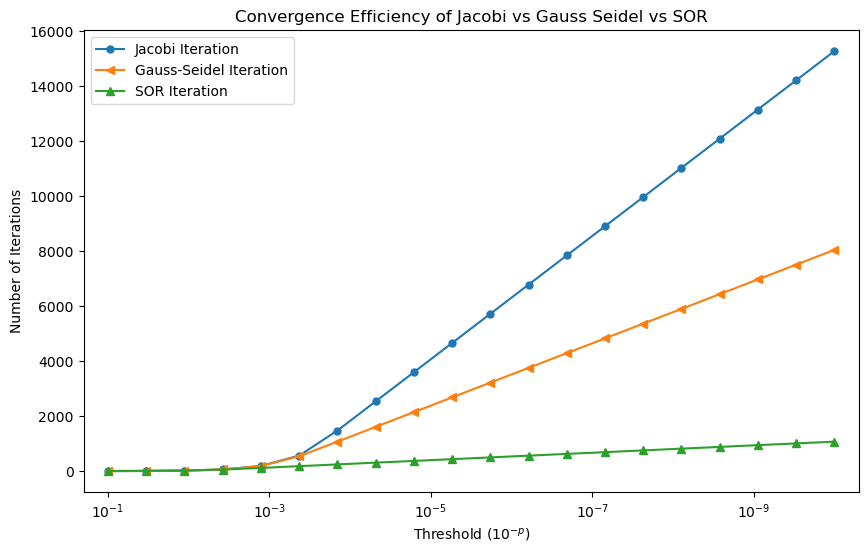

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(threshold, jacobi_iter, label='Jacobi Iteration', linestyle='-', marker='o', markersize=5)
plt.semilogx(threshold, gauss_seidel_iter, label='Gauss-Seidel Iteration', linestyle='-', marker='<', markersize=6)
plt.semilogx(threshold, sor_iter, label='SOR Iteration', linestyle='-', marker='^', markersize=6)
plt.xlim(2 * max(threshold), 1/2 * min(threshold))  # Reverse the x-axis
plt.xlabel('Threshold (log)')
plt.ylabel("Number of Iterations required")
plt.title("Convergence Efficiency of Jacobi vs Gauss Seidel vs SOR")
plt.legend()
plt.savefig("conv_eff_sc_set1.png", dpi = 300)
plt.show()

The following kernel tests how SOR convergence performs past the threshold of 1e-15: it takes about **15min** to run. While 1868 iterations are enough to bypass the 1e-15 threshold, 100000 aren't enough to bypass 1e-16 which is much higher than the Jacobi and Gauss Seidel iterations needed to pass 1e-16.

In [19]:
%%time

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-15:
    iter += 1
    diff = sor(domain) - domain 
    conv = np.max(diff)
    domain = sor(domain)
print(conv, iter)

while conv > 1e-16 and iter < 100000:
    iter += 1
    diff = sor(domain) - domain 
    conv = np.max(diff)
    domain = sor(domain)
print(conv, iter)

8.881784197001252e-16 1868
1.5543122344752192e-15 100000
CPU times: total: 9min 10s
Wall time: 21min 56s
